In [179]:
import sys
import pandas as pd
from openbb import obb
from datetime import datetime
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, Date, Float
from sqlalchemy.exc import SQLAlchemyError
from sqlalchemy import inspect
import yfinance as yf
import plotly
import plotly.graph_objects as go
import ta
import numpy as np
import matplotlib.pyplot as plt
import json


In [2]:
# check environment
print(sys.prefix)
print(sys.executable)

/Users/liuxingyu/project/finance/.venv
/Users/liuxingyu/project/finance/.venv/bin/python


In [201]:
# parameters
symbol_list = ['NVDA']
end_date = pd.Timestamp.now().tz_localize('Asia/Singapore').tz_convert('US/Eastern').strftime('%Y-%m-%d')
start_date = '1900-01-01'
interval = '1d'

In [202]:
symbol = symbol_list[0]

In [204]:
ticker_obj = yf.Ticker(symbol)
ticker_obj

yfinance.Ticker object <NVDA>

In [205]:
ticker_obj.info['companyOfficers'] = json.dumps(ticker_obj.info['companyOfficers'])

In [207]:
df_info = pd.DataFrame([ticker_obj.info])
df_info

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,...,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
0,2788 San Tomas Expressway,Santa Clara,CA,95051,United States,408 486 2000,https://www.nvidia.com,Semiconductors,semiconductors,Semiconductors,...,1.15658,29269749760,40524001280,6.293,2.621,0.75286,0.61768,0.64925,USD,1.3727


In [193]:
# ticker_obj.history_metadata

In [209]:
df_actions = ticker_obj.actions
df_actions['symbol'] = symbol
df_actions

,Dividends,Stock Splits,symbol
Date,,,
2000-06-27 00:00:00-04:00,0.00000,2.0,NVDA
2001-09-10 00:00:00-04:00,0.00000,2.0,NVDA
2006-04-07 00:00:00-04:00,0.00000,2.0,NVDA
2007-09-11 00:00:00-04:00,0.00000,1.5,NVDA
2012-11-20 00:00:00-05:00,0.01875,0.0,NVDA
2013-02-26 00:00:00-05:00,0.01875,0.0,NVDA
2013-05-21 00:00:00-04:00,0.01875,0.0,NVDA
2013-08-20 00:00:00-04:00,0.01875,0.0,NVDA
2013-11-19 00:00:00-05:00,0.02125,0.0,NVDA


In [213]:
# pd.DataFrame(ticker_obj.get_shares_full(start=start_date, end=end_date))

In [214]:
df_quarterly_income_stmt = ticker_obj.quarterly_income_stmt.transpose()

In [215]:
df_quarterly_balance_sheet = ticker_obj.quarterly_balance_sheet.transpose()

In [216]:
df_quarterly_cashflow = ticker_obj.quarterly_cashflow.transpose()

In [219]:
df_recommendations_summary = ticker_obj.recommendations_summary

In [221]:
df_upgrades_downgrades = ticker_obj.upgrades_downgrades

In [223]:
df_get_earnings_dates = ticker_obj.get_earnings_dates(limit=1000)

In [224]:
df_news = pd.DataFrame(ticker_obj.news)

In [225]:
# start_date and end_date default is 99 years and now if set none
data_historical = yf.download(symbol, interval='1d', period='max', actions='True')

[*********************100%%**********************]  1 of 1 completed


In [226]:
# Calculate RSI
data_historical["RSI"] = ta.momentum.RSIIndicator(data_historical["Close"]).rsi()

# Calculate Bollinger Bands
bbands = ta.volatility.BollingerBands(data_historical["Close"])
data_historical["BB_upper"] = bbands.bollinger_hband()
data_historical["BB_lower"] = bbands.bollinger_lband()

# Calculate MACD
macd = ta.trend.MACD(data_historical["Close"])
data_historical["MACD"] = macd.macd()
data_historical["MACD_signal"] = macd.macd_signal()

# Calculate percentage change
data_historical['pct_change'] = data_historical['Adj Close'].pct_change()

In [145]:
data_historical['Adj Close'].std()

132.18454921550298

In [147]:
data_historical['pct_change'].mean()

0.001963128802939846

In [148]:
# np.sqrt(((data_historical['pct_change'] - data_historical['pct_change'].mean())**2).mean())
data_historical['pct_change'].std()

0.03788428402534732

In [149]:
# assume 252 trading days per year
annualized_volatility = data_historical['pct_change'].std()*np.sqrt(255)
annualized_volatility

0.6049635021295602

In [150]:
# average daily return as geometric mean
returns_per_day = (data_historical['pct_change']+1).prod()**(1/data_historical.shape[0])-1
returns_per_day

0.0012509399742193228

In [151]:
# calculate annualized return
annualized_return = (returns_per_day+1)**252-1
annualized_return

0.37031393959676717

In [152]:
# assume a constant risk free rate
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_volatility
sharpe_ratio

0.5625363156600559

# MA
### Simple Moving Average (SMA)

In [154]:
window = 3
# min_periods = 1 let the ma starting with first month
SMA1 = "SMA-"+str(window)
data_historical[SMA1] = data_historical['Adj Close'].rolling(window,min_periods=1).mean()

In [155]:
window = 20
SMA2 = "SMA-"+str(window)
data_historical[SMA2] = data_historical['Adj Close'].rolling(window,min_periods=1).mean()

### Exponential Movining Average (EMA)

In [156]:
alpha = 0.1
data_historical['EMA_'+str(alpha)] = data_historical['Adj Close'].ewm(alpha=alpha, adjust=False).mean()

In [157]:
alpha = 0.5
data_historical['EMA_'+str(alpha)] = data_historical['Adj Close'].ewm(alpha=alpha, adjust=False).mean()

# Trend Following Strategy

In [164]:
# Shift to the future by one day so that everyday uses the information up to 
# yesterday to make a trading decision for tmr
data_historical['SMA-3_shift_1d'] = data_historical['SMA-3'].shift(1)
data_historical['SMA-20_shift_1d'] = data_historical['SMA-20'].shift(1)

In [165]:
# identify buy signal
data_historical['signal'] = np.where(data_historical['SMA-3_shift_1d'] > data_historical['SMA-20_shift_1d'], 1, 0)
# identify sell signal
data_historical['signal'] = np.where(data_historical['SMA-3_shift_1d'] < data_historical['SMA-20_shift_1d'], -1, data_historical['signal'])

In [166]:
data_historical['signal'].value_counts()

signal
 1    3713
-1    2664
 0       4
Name: count, dtype: int64

In [170]:
# calculate instantaneous log return for buy-and-hold straetegy as benchmark
data_historical['log_return_buy_n_hold'] = np.log(data_historical['Adj Close']).diff()
data_historical.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,RSI,BB_upper,...,MACD_signal,pct_change,SMA-3,SMA-20,EMA_0.1,EMA_0.5,SMA-3_shift_1d,SMA-20_shift_1d,signal,log_return_buy_n_hold
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376237,271468800,0.0,0.0,NaN,NaN,...,NaN,NaN,0.376237,0.376237,0.376237,0.376237,NaN,NaN,0,NaN
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415653,51048000,0.0,0.0,NaN,NaN,...,NaN,0.104763,0.395945,0.395945,0.380179,0.395945,0.376237,0.376237,0,0.099631
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383404,34320000,0.0,0.0,NaN,NaN,...,NaN,-0.077586,0.391764,0.391764,0.380501,0.389674,0.395945,0.395945,0,-0.080761
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382210,24436800,0.0,0.0,NaN,NaN,...,NaN,-0.003115,0.393755,0.389376,0.380672,0.385942,0.391764,0.391764,0,-0.003120
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381015,22752000,0.0,0.0,NaN,NaN,...,NaN,-0.003125,0.382210,0.387704,0.380706,0.383479,0.393755,0.389376,1,-0.003130


In [171]:
# calculate instantaneous log return for trend following straetegy
data_historical['log_return_trend_follow'] = data_historical['signal'] * data_historical['log_return_buy_n_hold']
data_historical.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,RSI,BB_upper,...,pct_change,SMA-3,SMA-20,EMA_0.1,EMA_0.5,SMA-3_shift_1d,SMA-20_shift_1d,signal,log_return_buy_n_hold,log_return_trend_follow
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376237,271468800,0.0,0.0,NaN,NaN,...,NaN,0.376237,0.376237,0.376237,0.376237,NaN,NaN,0,NaN,NaN
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415653,51048000,0.0,0.0,NaN,NaN,...,0.104763,0.395945,0.395945,0.380179,0.395945,0.376237,0.376237,0,0.099631,0.00000
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383404,34320000,0.0,0.0,NaN,NaN,...,-0.077586,0.391764,0.391764,0.380501,0.389674,0.395945,0.395945,0,-0.080761,-0.00000
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382210,24436800,0.0,0.0,NaN,NaN,...,-0.003115,0.393755,0.389376,0.380672,0.385942,0.391764,0.391764,0,-0.003120,-0.00000
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381015,22752000,0.0,0.0,NaN,NaN,...,-0.003125,0.382210,0.387704,0.380706,0.383479,0.393755,0.389376,1,-0.003130,-0.00313


In [172]:
# derive trading action at each time step; 2 is buy, -2 is sell
data_historical['action'] = data_historical.signal.diff()
data_historical['action'].value_counts()

action
 0.0    5909
-2.0     235
 2.0     235
 1.0       1
Name: count, dtype: int64

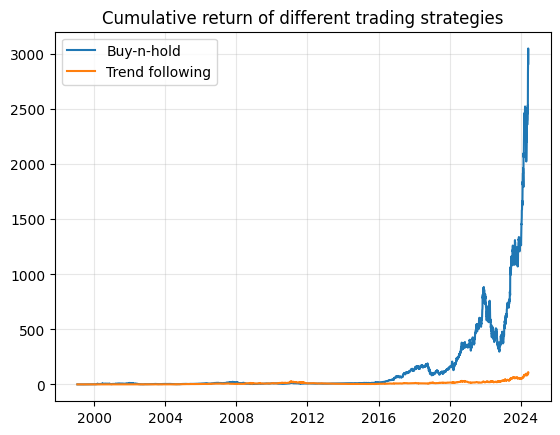

In [176]:
# plot cumulative return
plt.plot(np.exp(data_historical['log_return_buy_n_hold']).cumprod(), label='Buy-n-hold')
plt.plot(np.exp(data_historical['log_return_trend_follow']).cumprod(), label='Trend following')
plt.legend(loc=2)
plt.title("Cumulative return of different trading strategies")
plt.grid(True, alpha=.3)

In [177]:
# terminal return of buy-n-hold
np.exp(data_historical['log_return_buy_n_hold']).cumprod()[-1] -1

/var/folders/52/kchtcfps56z19pkp2v4c184r0000gn/T/ipykernel_79478/2624439245.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(data_historical['log_return_buy_n_hold']).cumprod()[-1] -1


2912.934412347992

In [178]:
# terminal return of trend following
np.exp(data_historical['log_return_trend_follow']).cumprod()[-1] -1

/var/folders/52/kchtcfps56z19pkp2v4c184r0000gn/T/ipykernel_79478/3517869642.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(data_historical['log_return_trend_follow']).cumprod()[-1] -1


106.63529086576861